## Categorical Plot

### seaborn.boxenplot
seaborn.boxenplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, k_depth='proportion', linewidth=None, scale='exponential', outlier_prop=None, showfliers=True, ax=None, **kwargs)
Draw an enhanced box plot for larger datasets.

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails. For a more extensive explanation, you can read the paper that introduced the plot:

https://vita.had.co.nz/papers/letter-value-plot.html

Input data can be passed in a variety of formats, including:

Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

A “wide-form” DataFrame, such that each numeric column will be plotted.

An array or list of vectors.

In most cases, it is possible to use numpy or Python objects, but pandas objects are preferable because the associated names will be used to annotate the axes. Additionally, you can use Categorical types for the grouping variables to control the order of plot elements.

This function always treats one of the variables as categorical and draws data at ordinal positions (0, 1, … n) on the relevant axis, even when the data has a numeric or date type.

See the tutorial for more information.

Parameters
x, y, huenames of variables in data or vector data, optional
Inputs for plotting long-form data. See examples for interpretation.

dataDataFrame, array, or list of arrays, optional
Dataset for plotting. If x and y are absent, this is interpreted as wide-form. Otherwise it is expected to be long-form.

order, hue_orderlists of strings, optional
Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.

orient“v” | “h”, optional
Orientation of the plot (vertical or horizontal). This is usually inferred from the dtype of the input variables, but can be used to specify when the “categorical” variable is a numeric or when plotting wide-form data.

colormatplotlib color, optional
Color for all of the elements, or seed for a gradient palette.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

saturationfloat, optional
Proportion of the original saturation to draw colors at. Large patches often look better with slightly desaturated colors, but set this to 1 if you want the plot colors to perfectly match the input color spec.

widthfloat, optional
Width of a full element when not using hue nesting, or width of all the elements for one level of the major grouping variable.

dodgebool, optional
When hue nesting is used, whether elements should be shifted along the categorical axis.

k_depth“proportion” | “tukey” | “trustworthy”, optional
The number of boxes, and by extension number of percentiles, to draw. All methods are detailed in Wickham’s paper. Each makes different assumptions about the number of outliers and leverages different statistical properties.

linewidthfloat, optional
Width of the gray lines that frame the plot elements.

scale“linear” | “exponential” | “area”
Method to use for the width of the letter value boxes. All give similar results visually. “linear” reduces the width by a constant linear factor, “exponential” uses the proportion of data not covered, “area” is proportional to the percentage of data covered.

outlier_propfloat, optional
Proportion of data believed to be outliers. Used in conjunction with k_depth to determine the number of percentiles to draw. Defaults to 0.007 as a proportion of outliers. Should be in range [0, 1].

showfliersbool, optional
If False, suppress the plotting of outliers.

axmatplotlib Axes, optional
Axes object to draw the plot onto, otherwise uses the current Axes.

kwargskey, value mappings
Other keyword arguments are passed through to matplotlib.axes.Axes.plot() and matplotlib.axes.Axes.scatter().

Returns
axmatplotlib Axes
Returns the Axes object with the plot drawn onto it.

Examples

Draw a single horizontal boxen plot:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


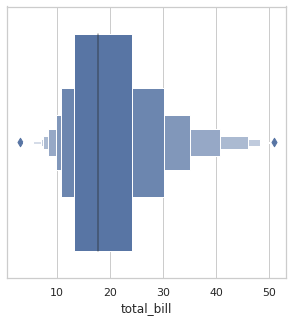

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxenplot(x=tips['total_bill'])
plt.show()

Draw a vertical boxen plot grouped by a categorical variable

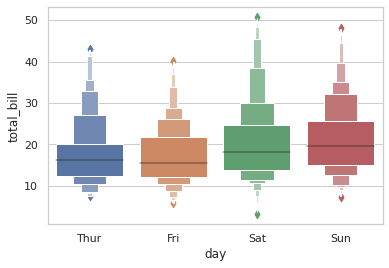

In [7]:
sns.boxenplot(x='day', y='total_bill', data=tips)
plt.show()

Draw a letter value plot with nested grouping by two categorical variables:

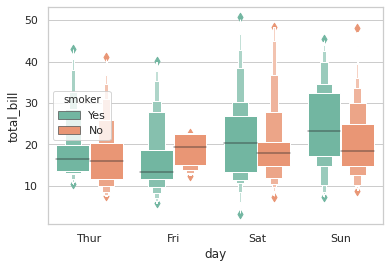

In [9]:
sns.boxenplot(x='day', y='total_bill', data=tips,hue='smoker', palette='Set2')
plt.show()

Draw a boxen plot with nested grouping when some bins are empty:


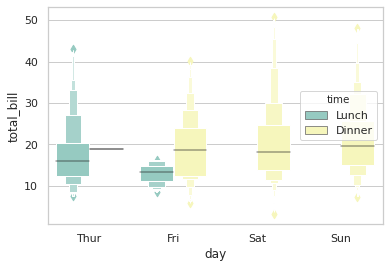

In [10]:
sns.boxenplot(x='day', y='total_bill', data=tips, hue='time',palette='Set3')
plt.show()

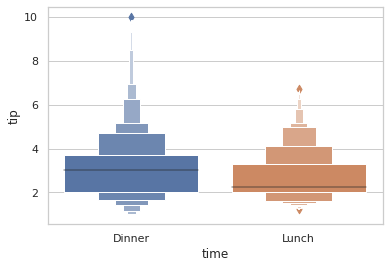

In [11]:
#Control box order by passing an explicit order:

ax = sns.boxenplot(x="time", y="tip", data=tips,
                   order=["Dinner", "Lunch"])

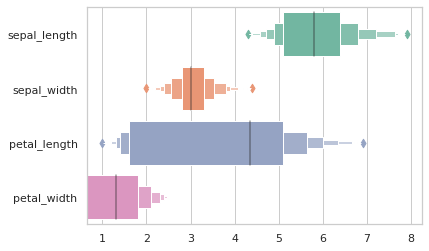

In [12]:
#Draw a boxen plot for each numeric variable in a DataFrame:

iris = sns.load_dataset("iris")
ax = sns.boxenplot(data=iris, orient="h", palette="Set2")

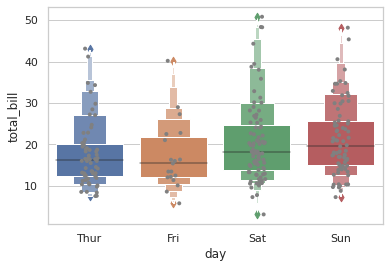

In [13]:
#Use stripplot() to show the datapoints on top of the boxes:

ax = sns.boxenplot(x="day", y="total_bill", data=tips)
ax = sns.stripplot(x="day", y="total_bill", data=tips,
                   size=4, color="gray")

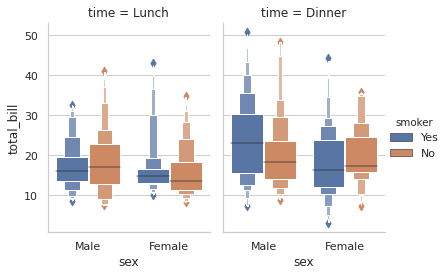

In [14]:
g = sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="boxen",
                height=4, aspect=.7);